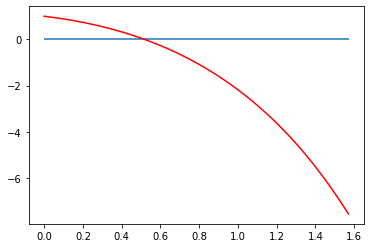

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def f(x: float): # Or use f= lambda x : np.cos(x) - x*np.exp(x)
    return np.cos(x) - x*np.exp(x)
x=np.arange(0,np.pi/2,0.001)
y=f(x)
plt.plot(x,y,color="r")
plt.hlines(y=0,xmin=0,xmax=np.pi/2)
plt.show()

#### Bisection Method:
Suppose $f$ is a continuous function deﬁned on the interval $[a, b]$,

1. set $c=\frac{(a+b)}{2}$
2. if $f(c)=0$, return $c$
3. if $f(c)\neq 0$,
    1. if $f(a)\times f(c)>0$, set $a=c$
    2. if $f(a)\times f(c)<0$, set $b=c$
4. if the stop criteria is `True` stop else goto (1)

In [18]:
def BSroot(a,b,eps):
    n_iter=1;
    c=(a+b)/2
    while(abs(f(c))>eps):
        if f(a)*f(c)<0:b=c
        elif(f(a)*f(c)>0): a=c
        c=(a+b)/2
        n_iter+=1
    return([c,n_iter])
BSroot(0,np.pi/2,0.00000001)

[0.5177573651639169, 28]

#### Newton-Raphson method
Suppose $f$ is a continuous function deﬁned on the interval  $[𝑎,𝑏]$, and $f'$ it's derivative.
1. Let $x_0$ is an initial approximation of the root of $f$, such that $f(x_0)\neq 0$.
2. Compute $x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$ for $n \geq 1$ Until we attend the stop critaria.

In [16]:
def fprime(x): return -(np.sin(x)+(1+x)*np.exp(x))

In [13]:
def NRroot(x_old,eps):
    x_new=x_old-f(x_old)/fprime(x_old)
    n_iter=1
    while(np.abs(x_new-x_old)>eps):
        x_old=x_new
        x_new=x_old-f(x_old)/fprime(x_old)
        n_iter+=1
    return [x_new,n_iter]

In [128]:
NRroot(np.pi/4,0.00000001)

[0.5177573636824583, 5]

#### Secant method
Newton's method is an extremely powerful technique, but it has a major weakness: the need
to know the value of the derivative of f at each approximation. To avoid the problem of the derivative evaluation in Newton's method, the secant method introduced as

1. Let $x_0,x_1$ two initial approximations of the root of $f$.
2. Compute $x_n=x_{n-1}-\frac{f(x_{n-1})(x_{n-1}-x_{n-2})}{f(x_{n-1})-f(x_{n-2})}$ for $n \geq 1$ Until we attend the stop critaria.

In [19]:
def SCroot(x_old,eps):
    x_new=x_old[1]-f(x_old[1])*(x_old[1]-x_old[0])/(f(x_old[1])-f(x_old[0]))
    n_iter=1
    while(np.abs(x_new-x_old[1])>eps):
        x_old=[x_old[1],x_new]
        x_new=x_old[1]-f(x_old[1])*(x_old[1]-x_old[0])/(f(x_old[1])-f(x_old[0]))
        n_iter+=1
    return [x_new,n_iter]

In [134]:
SCroot([0.,np.pi/4],0.00000001)

[0.5177573636824583, 7]

In [10]:
from typing import Callable
def g(x):
    return np.cos(x)*np.exp(-x)
def FProot(g:Callable[[float],float],x0,eps):
    xn=g(x0)
    n_iter=1
    while (abs(f(xn))>eps):
        x0=xn
        xn=g(x0)
        n_iter+=1
    return([xn,n_iter])
FProot(g,np.pi/4,10**(-8))

[0.5177573665602934, 88]

In [21]:
from tabulate import tabulate
n=[]
for k in range(1,11):
    eps=10**(-k)
    n.append([eps,BSroot(0,np.pi/2,eps)[1],NRroot(np.pi/4,eps)[1],SCroot([0,np.pi/4],eps)[1]])

In [24]:
print(tabulate(n, ['e','Nbr iterations BS',' Nbr iterations NR',' Nbr iterations FP'], "grid"))

+--------+---------------------+----------------------+----------------------+
|      e |   Nbr iterations BS |    Nbr iterations NR |    Nbr iterations FP |
+========+=====================+======================+======================+
| 0.1    |                   4 |                    2 |                    3 |
+--------+---------------------+----------------------+----------------------+
| 0.01   |                   6 |                    3 |                    4 |
+--------+---------------------+----------------------+----------------------+
| 0.001  |                  11 |                    4 |                    5 |
+--------+---------------------+----------------------+----------------------+
| 0.0001 |                  15 |                    4 |                    5 |
+--------+---------------------+----------------------+----------------------+
| 1e-05  |                  17 |                    4 |                    6 |
+--------+---------------------+--------------------